In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.metrics import accuracy_score
import pandas as pd
import torch
import ast
import json
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
######
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression  # pip install scikit-learn
import pickle
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
####
import nltk
import requests
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = 999
set_config(display='diagram')
#####
import streamlit as st
from PIL import Image
import numpy as np
import pickle
import time
import json
#import torch
from collections import Counter
import re
import string
import nltk
from nltk.corpus import stopwords
import nltk
import ssl
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

2023-11-21 20:15:35.525 Python[21524:436219] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# create get_sentiment function
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akamdem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/akamdem/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[n

True

In [12]:
#reading in rthe training set rel 3 documents
df = pd.read_excel('/Users/akamdem/Downloads/asap_aes2/training_set_rel3.xlsx')
df.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
threshold = 10
df.dropna(thresh=len(df) - threshold, axis=1, inplace=True)
df.fillna(0, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   essay_id             12978 non-null  int64  
 1   essay_set            12978 non-null  int64  
 2   essay                12978 non-null  object 
 3   rater1_domain1       12978 non-null  float64
 4   rater2_domain1       12978 non-null  float64
 5   domain1_score        12978 non-null  float64
 6   sentiment_score      12978 non-null  float64
 7   stopword_count       12978 non-null  int64  
 8   vader_scores         12978 non-null  object 
 9   length               12978 non-null  int64  
 10  stopword_proportion  12978 non-null  float64
 11  neg                  12978 non-null  float64
 12  neu                  12978 non-null  float64
 13  pos                  12978 non-null  float64
 14  compound             12978 non-null  float64
dtypes: float64(9), int64(4), object(2)
m

In [36]:
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # You can access sentiment polarity with analysis.sentiment.polarity
    return analysis.sentiment.polarity
def count_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Count the stopwords
    stopword_count = sum(1 for word in words if word.lower() in stopwords.words('english'))
    return stopword_count

In [8]:
df['sentiment_score'] = df['essay'].apply(analyze_sentiment)
df['stopword_count'] = df['essay'].apply(count_stopwords) #########
df['vader_scores'] = df['essay'].apply(get_sentiment_scores)
df['length'] = df.essay.str.len()
df['stopword_proportion'] = df.stopword_count/df.essay.str.len()

<Axes: ylabel='Frequency'>

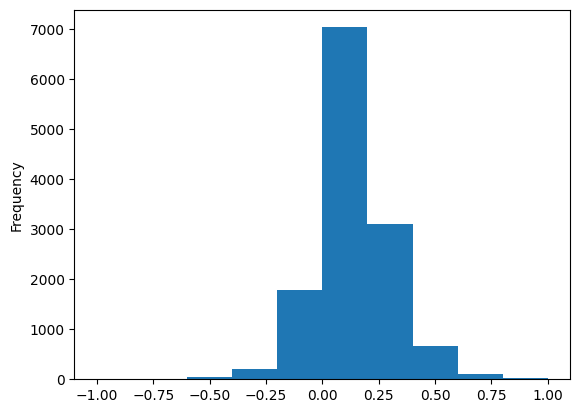

In [37]:
df['sentiment_score'].plot(kind='hist')

<Axes: ylabel='Frequency'>

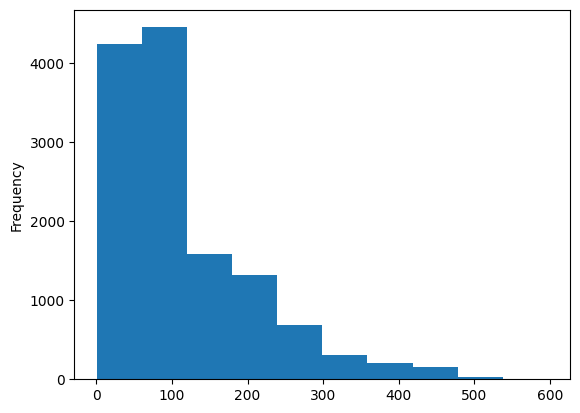

In [38]:
df['stopword_count'].plot(kind='hist')

<Axes: ylabel='Frequency'>

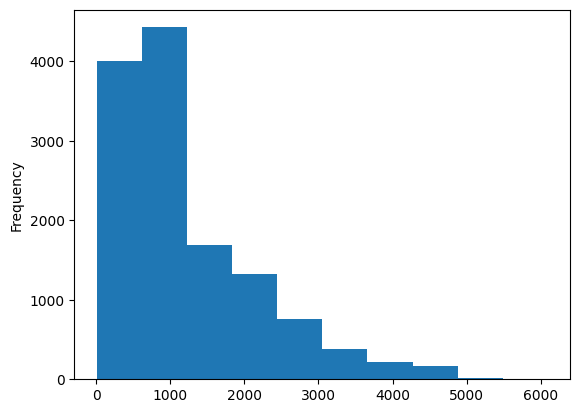

In [39]:
df['length'].plot(kind='hist')

<Axes: ylabel='Frequency'>

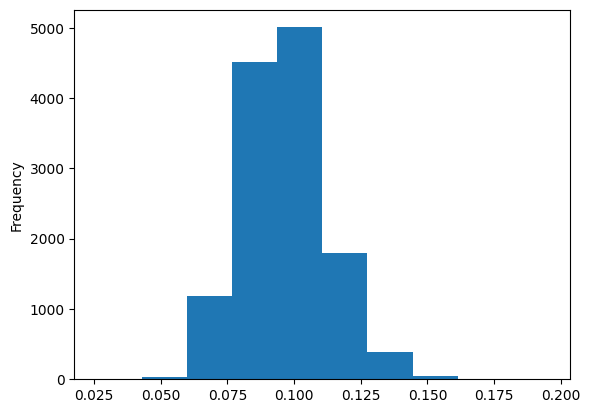

In [40]:
df['stopword_proportion'].plot(kind='hist')

In [41]:
df['neg'] = df['vader_scores'].apply(lambda x: x['neg'])
df['neu'] = df['vader_scores'].apply(lambda x: x['neu'])
df['pos'] = df['vader_scores'].apply(lambda x: x['neg'])
df['compound'] = df['vader_scores'].apply(lambda x: x['compound'])

In [42]:
df.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,sentiment_score,stopword_count,vader_scores,length,stopword_proportion,neg,neu,pos,compound
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,0.310471,176,"{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compou...",1875,0.093867,0.000,0.830,0.000,0.9954
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,0.274000,195,"{'neg': 0.014, 'neu': 0.766, 'pos': 0.219, 'co...",2288,0.085227,0.014,0.766,0.014,0.9983


In [43]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential, load_model, model_from_config
import keras.backend as K
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score

In [44]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/akamdem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akamdem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
def essay_to_wordlist(essay_v, remove_stopwords):
    """Remove the tagged labels and word tokenize the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    index_to_key_set = set(model.wv.index_to_key) # index2word and index2entity attribute is now index_to_key
    for word in words:
        if word in index_to_key_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word]) # https://stackoverflow.com/questions/67687962/typeerror-word2vec-object-is-not-subscriptable
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [46]:
def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    model.summary()

    return model

In [47]:
y = df['domain1_score'].dropna()
#X = X.dropna(axis=1)
#X = df['essay']
X = df.drop(columns=['rater1_domain1', 'rater2_domain1','domain1_score','vader_scores']).dropna()

In [49]:
# cv = KFold(len(X), n_folds=5, shuffle=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
y_pred_list = []

count = 1
for train, test in kf.split(X):
    print("\n--------Fold {}--------\n".format(count))
    X_test, X_train, y_test, y_train = X.iloc[test], X.iloc[train], y.iloc[test], y.iloc[train]

    train_essays = X_train['essay']
    test_essays = X_test['essay']

    sentences = []

    for essay in train_essays:
            # Obtaining all sentences from the training essays.
            sentences += essay_to_sentences(essay, remove_stopwords = True)

    # Initializing variables for word2vec model.
    num_features = 300
    min_word_count = 40
    num_workers = 4
    context = 10
    downsampling = 1e-3

    print("Training Word2Vec Model...")
    model = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count = min_word_count, window = context, sample = downsampling)

    model.init_sims(replace=True)
    model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)

    clean_train_essays = []

    # Generate training and testing data word vectors.
    for essay_v in train_essays:
        clean_train_essays.append(essay_to_wordlist(essay_v, remove_stopwords=True))
    trainDataVecs = getAvgFeatureVecs(clean_train_essays, model, num_features)

    clean_test_essays = []
    for essay_v in test_essays:
        clean_test_essays.append(essay_to_wordlist( essay_v, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )

    trainDataVecs = np.array(trainDataVecs)
    testDataVecs = np.array(testDataVecs)
    # Reshaping train and test vectors to 3 dimensions. (1 represents one timestep)
    trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))

    lstm_model = get_model()
    lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=50)
    #lstm_model.load_weights('./model_weights/final_lstm.h5')
    y_pred = lstm_model.predict(testDataVecs)

    # Save any one of the 8 models.
    if count == 5:
         lstm_model.save('./model_weights/final_lstm.h5')

    # Round y_pred to the nearest integer.
    y_pred = np.around(y_pred)

    # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
    result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
    print("Kappa Score: {}".format(result))
    results.append(result)

    count += 1


--------Fold 1--------

Training Word2Vec Model...


/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_21524/3811815333.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 300)            721200    
                                                                 
 lstm_13 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 8ms/step - loss: 65.3055 - mae: 4.3875
Epoch 2/50
163/163 [==============================] - 

/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_21524/3811815333.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 300)            721200    
                                                                 
 lstm_15 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 4s 12ms/step - loss: 63.1622 - mae: 4.3370
Epoch 2/50
163/163 [==============================] -

/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_21524/3811815333.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 300)            721200    
                                                                 
 lstm_17 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 8ms/step - loss: 66.4294 - mae: 4.4496
Epoch 2/50
163/163 [==============================] - 

/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_21524/3811815333.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 300)            721200    
                                                                 
 lstm_19 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 3s 8ms/step - loss: 64.0569 - mae: 4.3259
Epoch 2/50
163/163 [==============================] - 

/var/folders/4z/1rd4dz4x7mnbm85c5ppsc6ww0000gq/T/ipykernel_21524/3811815333.py:30: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 1, 300)            721200    
                                                                 
 lstm_21 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 814705 (3.11 MB)
Trainable params: 814705 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
163/163 [==============================] - 5s 8ms/step - loss: 64.3144 - mae: 4.3563
Epoch 2/50
163/163 [==============================] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
print("Average Kappa score after a 5-fold cross validation: ",np.around(np.array(results).mean(),decimals=4))

Average Kappa score after a 5-fold cross validation:  0.9587


In [ ]:
y = df['domain1_score']
#X = X.dropna(axis=1)
#X = df['essay']
X = df.drop(columns=['rater1_domain1', 'rater2_domain1','domain1_score'])

In [1]:
X

NameError: name 'X' is not defined

In [173]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['essay'])

### INCORPORATE BOTH ESSAY AND ATTITUDES

In [174]:
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_df[['compound','neg','pos','neu','stopword_proportion','stopword_count','length','sentiment_score']] = df[['compound','neg','pos','neu','stopword_proportion','stopword_count','length','sentiment_score']]


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_df, df['domain1_score'], test_size=0.2, random_state=42)

In [178]:
#X = df[['compound','neg','pos','neu','stopword_proportion','stopword_count','length','sentiment_score']]
#y = df['domain1_score']

# Create a TF-IDF vectorizer
#vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
# Transform the text data into numerical features
#X_tfidf = vectorizer.fit_transform(X)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [179]:
y_pred = clf.predict(X_test)

In [184]:
X_test

00  000  00pm  046  101st  102  102nd   11   12   13   15  185  190  \
4999  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6319  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4606  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4393  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3404  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...   ...  ...    ...  ...    ...  ...  ...  ...  ...  ...  ...   
6045  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9252  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3860  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3314  0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   
79    0.0  0.0   0.0  0.0    0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      1920s  1929  1930  1930s  1931  1937  1956  1961  1970   21  250   27  \
4999    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
6319    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
4606    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
4393    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
3404    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
...     ...   ...   ...    ...   ...   ...   ...   ...   ...  ...  ...  ...   
6045    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
9252    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
3860    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
3314    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
79      0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   

       30  30am  30pm   35   41   45   46   51   55      85th  _________   aa  \
4999  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
6319  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
4606  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
4393  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
3404  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
...   ...   ...   ...  ...  ...  ...  ...  ...  ...       ...        ...  ...   
6045  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
9252  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.144753        0.0  0.0   
3860  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
3314  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   
79    0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000        0.0  0.0   

      aamerica  aamous  aand  aare  aas  aase  aasked   ab  aback  abad  \
4999       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
6319       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
4606       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
4393       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
3404       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
...        ...     ...   ...   ...  ...   ...     ...  ...    ...   ...   
6045       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
9252       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
3860       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
3314       0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   
79         0.0     0.0   0.0   0.0  0.0   0.0     0.0  0.0    0.0   0.0   

      abadond  abait  abalt  abanded  abandon  abandond  abandone  abandoned  \
4999      0.0    0.0    0.0      0.0      0.0       0.0       0.0        0.0   
6319      0.0    0.0    0.0      0.0      0.0       0.0       0.0        0.0   
4606   

In [182]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print the evaluation scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1_score}')

Accuracy: 0.48805855161787365
Precision: 0.44251191307455034
Recall: 0.48805855161787365
F1-Score: 0.42950725611996826


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
minimum_scores = [-1, 2, 1, 0, 0, 0, 0, 0, 0]
maximum_scores = [-1, 12, 6, 3, 3, 4, 4, 30, 60]

In [19]:
y = df['domain1_score']
#X = X.dropna(axis=1)
#X = df['essay']
X = df.drop(columns=['rater1_domain1', 'rater2_domain1','domain1_score'])

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(df['essay'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm_classifier = ExplainableBoostingClassifier()

In [22]:

ebm_classifier.fit(X_train, y_train) 

KeyboardInterrupt: 

In [ ]:
y_pred = ebm_model.predict(X_test)  # Replace 'ebm_model' with your trained EBM model

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion)